## Problem Statement

### Business Context

Airbnb is an online platform that allows people to rent short-term accommodation. This ranges from regular people with a spare bedroom to property management firms who lease multiple rentals. On the one side, Airbnb enables owners to list their space and earn rental money. On the other side, it provides travelers easy access to renting private homes.

Airbnb receives commissions from two sources upon every booking, namely from the hosts and guests. For every booking, Airbnb charges the guest 6-12% of the booking fee. Moreover, Airbnb charges the host 3% for every successful transaction.

As a senior data scientist at Airbnb, you have to come up with a pricing model that can effectively predict the Rent for accommodation and can help hosts, travelers, and also the business in devising profitable strategies.

### Objective

To explore and visualize the data, build a linear regression model to predict the prices of Airbnb rental rooms, and generate a set of insights and recommendations that will help the business.

### Data Description

The data contains information about the different types of rental rooms offered by Airbnb over a fixed period of time. The detailed data dictionary is given below.

**Data Dictionary**

- id: Property ID
- room_type: Type of Room in the property
- accommodates: How many adults can this property accommodate
- bathrooms: Number of bathrooms on the property
- cancellation_policy: Cancellation policy of the property
- cleaning_fee: This denotes whether the property cleaning fee is included in the rent or not
- instant_bookable: It indicates whether an instant booking facility is available or not
- review_scores_rating: Review rating score of the property
- bedrooms: Number of bedrooms in the property
- beds: Total number of beds in the property
- log_price: Log of the rental price of the property for a fixed period. [If the price is 12000 dollars, then log_price represents log(12000)]

## Importing necessary libraries

In [1]:
# ✅ Install only compatible modern packages in Colab
!pip install -q --upgrade \
    numpy==1.26.4 \
    pandas==2.2.2 \
    matplotlib==3.8.4 \
    seaborn==0.13.2 \
    scikit-learn==1.5.0


:**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
# GitHub raw link
url = "https://raw.githubusercontent.com/EvagAIML/AIML/main/Airbnb.csv"

# Load the dataset
df = pd.read_csv(url)

# Preview the dataset
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


## Data Overview

- Observations
- Sanity checks

In [7]:
# Shape and basic structure
print("Dataset Shape:", df.shape)
df.info()

# Summary stats and preview
display(df.head())
display(df.describe(include='all'))

# Missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Duplicates
print("\nDuplicate Rows:", df.duplicated().sum())

# Zero or negative values in key columns
for col in ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'log_price']:
    print(f"\n{col} - Zero or Negative Values:")
    display(df[df[col] <= 0])


Dataset Shape: (74111, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
count,7.411100e+04,74106,74108.000000,73908.000000,74103,74107,74111,57389.000000,74019.000000,73980.000000,74111.000000
unique,NaN,3,NaN,NaN,3,2,2,NaN,NaN,NaN,NaN
top,NaN,Entire home/apt,NaN,NaN,strict,True,f,NaN,NaN,NaN,NaN
freq,NaN,41308,NaN,NaN,32500,54399,54660,NaN,NaN,NaN,NaN
mean,1.126662e+07,NaN,3.155125,1.235272,NaN,NaN,NaN,94.067365,1.265797,1.710868,4.782069
std,6.081735e+06,NaN,2.153603,0.582054,NaN,NaN,NaN,7.836556,0.852149,1.254142,0.717394
min,3.440000e+02,NaN,1.000000,0.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000
25%,6.261964e+06,NaN,2.000000,1.000000,NaN,NaN,NaN,92.000000,1.000000,1.000000,4.317488
50%,1.225415e+07,NaN,2.000000,1.000000,NaN,NaN,NaN,96.000000,1.000000,1.000000,4.709530
75%,1.640226e+07,NaN,4.000000,1.000000,NaN,NaN,NaN,100.000000,1.000000,2.000000,5.220356



Missing Values:
id                          0
room_type                   5
accommodates                3
bathrooms                 203
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

Duplicate Rows: 0

accommodates - Zero or Negative Values:


,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price



bathrooms - Zero or Negative Values:


,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
318,16929145,Private room,2.0,0.0,moderate,True,f,88.0,1.0,1.0,3.555348
1356,455864,Shared room,1.0,0.0,flexible,False,f,NaN,1.0,1.0,3.912023
1441,18703078,Private room,2.0,0.0,strict,True,f,83.0,1.0,1.0,4.248495
1704,15007995,Private room,1.0,0.0,strict,True,f,93.0,1.0,1.0,3.688879
1819,15990468,Private room,3.0,0.0,flexible,False,f,NaN,1.0,1.0,4.499810
2034,9102963,Private room,2.0,0.0,moderate,True,f,70.0,1.0,1.0,3.555348
2068,8926537,Private room,1.0,0.0,flexible,False,f,NaN,1.0,1.0,3.583519
2298,1569444,Private room,1.0,0.0,flexible,True,t,87.0,1.0,1.0,3.761200
2356,14839106,Private room,1.0,0.0,flexible,False,f,100.0,1.0,1.0,4.867534
2582,8072141,Entire home/apt,4.0,0.0,strict,True,f,NaN,0.0,1.0,4.941642



bedrooms - Zero or Negative Values:


,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932
55,6443678,Entire home/apt,5.0,1.0,strict,True,f,100.0,0.0,2.0,4.744932
64,5806687,Entire home/apt,1.0,1.0,flexible,False,f,NaN,0.0,1.0,4.700480
69,11095719,Entire home/apt,2.0,1.0,flexible,True,f,100.0,0.0,1.0,4.499810
96,4576821,Entire home/apt,1.0,1.0,flexible,True,f,100.0,0.0,1.0,4.248495
...,...,...,...,...,...,...,...,...,...,...,...
74086,224510,Private room,2.0,1.0,strict,True,f,95.0,0.0,1.0,4.174387
74087,15042259,Entire home/apt,4.0,1.0,strict,True,t,100.0,0.0,2.0,4.477337
74091,3779249,Entire home/apt,2.0,1.0,moderate,False,f,100.0,0.0,1.0,5.010635
74098,8342838,Entire home/apt,4.0,1.0,flexible,True,f,88.0,0.0,2.0,4.553877



beds - Zero or Negative Values:


,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
13672,7922378,Entire home/apt,2.0,1.0,strict,True,f,NaN,1.0,0.0,5.129899
24062,20269147,Entire home/apt,2.0,1.0,strict,False,t,NaN,0.0,0.0,5.783825
39057,8684344,Entire home/apt,2.0,1.0,strict,True,t,94.0,0.0,0.0,4.691348
55285,15419976,Entire home/apt,4.0,1.0,strict,False,t,NaN,1.0,0.0,5.991465



log_price - Zero or Negative Values:


,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
11632,17972519,Shared room,1.0,1.0,strict,True,t,87.0,1.0,1.0,0.0


### Observations
	•	Dataset contains 74,111 rows × 11 columns and is mostly well-structured.
	•	Key features like room_type, accommodates, and log_price are well-populated, but review_scores_rating has ~23% missing.
	•	No duplicate entries were found — data appears uniquely identified.
	•	A few entries have 0 or invalid values in beds, bedrooms, or bathrooms, which may need correction.
	•	log_price is already transformed and suitable for modeling, with a few entries showing 0, requiring validation.

## Exploratory Data Analysis (EDA)

:- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

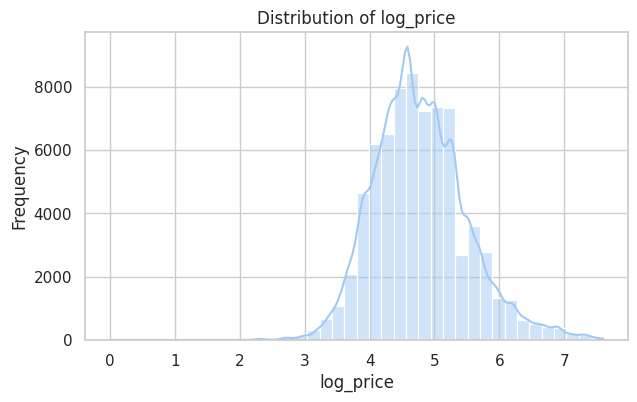

Listings with log_price = 0:


,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
11632,17972519,Shared room,1.0,1.0,strict,True,t,87.0,1.0,1.0,0.0


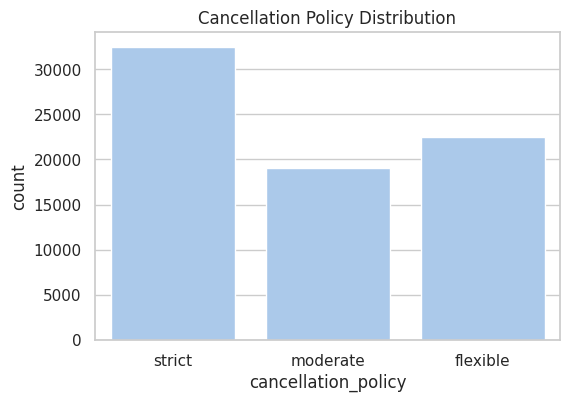

Unique cancellation policies: ['strict' 'moderate' 'flexible' nan]


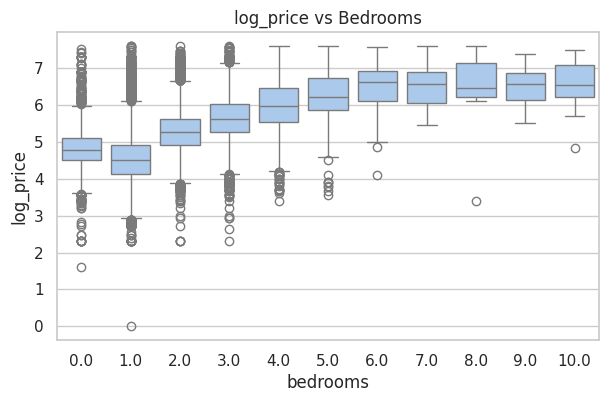

Listings with 0 bedrooms:


,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932
55,6443678,Entire home/apt,5.0,1.0,strict,True,f,100.0,0.0,2.0,4.744932
64,5806687,Entire home/apt,1.0,1.0,flexible,False,f,NaN,0.0,1.0,4.700480
69,11095719,Entire home/apt,2.0,1.0,flexible,True,f,100.0,0.0,1.0,4.499810
96,4576821,Entire home/apt,1.0,1.0,flexible,True,f,100.0,0.0,1.0,4.248495
...,...,...,...,...,...,...,...,...,...,...,...
74086,224510,Private room,2.0,1.0,strict,True,f,95.0,0.0,1.0,4.174387
74087,15042259,Entire home/apt,4.0,1.0,strict,True,t,100.0,0.0,2.0,4.477337
74091,3779249,Entire home/apt,2.0,1.0,moderate,False,f,100.0,0.0,1.0,5.010635
74098,8342838,Entire home/apt,4.0,1.0,flexible,True,f,88.0,0.0,2.0,4.553877


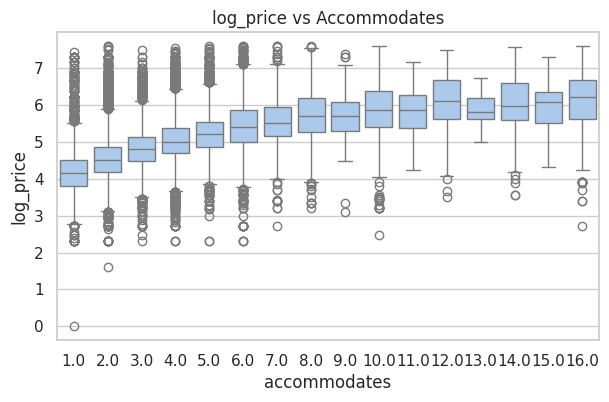

Listings with accommodates <= 1:


,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
33,10994968,Private room,1.0,NaN,moderate,True,f,99.0,1.0,1.0,4.488636
37,4209927,Private room,1.0,1.0,strict,True,f,84.0,1.0,1.0,3.912023
47,5117069,Private room,1.0,1.0,flexible,False,f,NaN,1.0,1.0,4.007333
64,5806687,Entire home/apt,1.0,1.0,flexible,False,f,NaN,0.0,1.0,4.700480
77,6972777,Private room,1.0,1.0,flexible,True,f,80.0,1.0,1.0,3.806662
...,...,...,...,...,...,...,...,...,...,...,...
74058,1256115,Private room,1.0,1.0,flexible,True,f,NaN,1.0,1.0,4.174387
74069,7679691,Private room,1.0,2.0,strict,True,f,NaN,1.0,1.0,4.382027
74082,15913471,Private room,1.0,1.0,flexible,True,f,94.0,1.0,1.0,4.174387
74101,18077717,Private room,1.0,1.0,moderate,True,f,90.0,1.0,1.0,4.584967


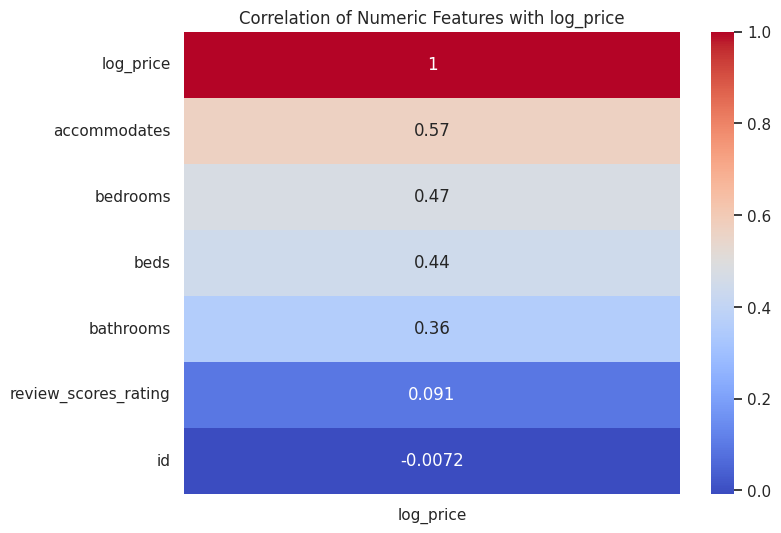

Missing values per column:
id                          0
room_type                   5
accommodates                3
bathrooms                 203
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="pastel")

# 1. Distribution of log_price — check for skew, zeros
plt.figure(figsize=(7,4))
sns.histplot(df['log_price'], bins=40, kde=True)
plt.title("Distribution of log_price")
plt.xlabel("log_price")
plt.ylabel("Frequency")
plt.show()

# Spot listings with log_price == 0 (invalid rentals?)
print("Listings with log_price = 0:")
display(df[df['log_price'] == 0])

# 2. Cancellation policy distribution — any unexpected values?
plt.figure(figsize=(6,4))
sns.countplot(x='cancellation_policy', data=df)
plt.title("Cancellation Policy Distribution")
plt.show()

# Unexpected or inconsistent categories
print("Unique cancellation policies:", df['cancellation_policy'].unique())

# 3. Bedrooms vs log_price — do 0 bedrooms exist?
plt.figure(figsize=(7,4))
sns.boxplot(x='bedrooms', y='log_price', data=df)
plt.title("log_price vs Bedrooms")
plt.show()

print("Listings with 0 bedrooms:")
display(df[df['bedrooms'] == 0])

# 4. Accommodates vs log_price — anomalies at low values?
plt.figure(figsize=(7,4))
sns.boxplot(x='accommodates', y='log_price', data=df)
plt.title("log_price vs Accommodates")
plt.show()

print("Listings with accommodates <= 1:")
display(df[df['accommodates'] <= 1])

# 5. Heatmap — correlation and null impact
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True)[['log_price']].sort_values(by='log_price', ascending=False),
            annot=True, cmap='coolwarm')
plt.title("Correlation of Numeric Features with log_price")
plt.show()

# 6. Check missing values (not cleaning yet, just exposing)
print("Missing values per column:")
print(df.isnull().sum())

**Questions**:

1. How are the prices (log_price) of properties distributed?
2. What is the market share of different cancellation policies?
3. How does the price (log_price) of a property vary by the number of bedrooms?
4. How does the price (log_price) of a property vary by the number of accommodates?
5. What are the attributes that have a strong correlation with the price (log_price) of the property?



**Observations**


1.  Price distribution (log_price)
The log_price variable is moderately right-skewed, with most properties priced between 4.0 and 5.5. However, a few listings have a log_price of 0, which is invalid and suggests missing or corrupted price entries.

2.  Cancellation policy (cancellation_policy)
The majority of listings follow the strict policy, followed by moderate and flexible. While the categories are clean, the skew toward strict policies may indicate low guest flexibility in cancellation terms.

3.	Bedrooms vs. price (bedrooms)
As expected, properties with more bedrooms tend to have higher prices. However, there are entries with 0 bedrooms, which may refer to studio-type listings or could be data entry issues that need further validation.

4.	Accommodates vs. price (accommodates)
Price increases with the number of people a property can accommodate, but a few listings show 1 or fewer accommodates, which raises questions about data quality or the validity of those listings.

5.	Correlation with price (log_price)
Features like accommodates, bedrooms, beds, and bathrooms have a positive correlation with log_price. In contrast, review_scores_rating shows very low correlation, indicating that review scores are not a strong pricing driver in


## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [10]:
# 1. Handling missing values

# Check % missing
missing_percent = df.isnull().mean() * 100
print("Missing value percentage by column:\n", missing_percent)

# Drop rows with missing log_price (target)
df = df[df['log_price'] > 0]

# Drop rows with missing review_scores_rating (optional: can impute if modeling with it)
df = df.dropna(subset=['review_scores_rating'])

# Fill numerical missing values with median (robust to outliers)
for col in ['bathrooms', 'bedrooms', 'beds', 'accommodates']:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# Fill cleaning_fee with mode
if 'cleaning_fee' in df.columns:
    df['cleaning_fee'] = df['cleaning_fee'].fillna(df['cleaning_fee'].mode()[0])

# Fill room_type and cancellation_policy with mode (few missing)
for col in ['room_type', 'cancellation_policy']:
    df[col] = df[col].fillna(df[col].mode()[0])

# 2. Fix invalid zeros (log_price already handled above)
for col in ['bedrooms', 'beds', 'bathrooms', 'accommodates']:
    df = df[df[col] > 0]

# 3. Convert categorical columns to binary if needed
# Example: Convert cleaning_fee and instant_bookable to 0/1
df['cleaning_fee'] = df['cleaning_fee'].map({'True': 1, 'False': 0, True: 1, False: 0})
df['instant_bookable'] = df['instant_bookable'].map({'t': 1, 'f': 0})

# 4. Final structure check
print("Final dataset shape:", df.shape)
print("\nAny remaining missing values:")
print(df.isnull().sum())

Missing value percentage by column:
 id                       0.000000
room_type                0.006747
accommodates             0.004048
bathrooms                0.273913
cancellation_policy      0.010795
cleaning_fee             0.005397
instant_bookable         0.000000
review_scores_rating    22.563452
bedrooms                 0.124138
beds                     0.176762
log_price                0.000000
dtype: float64
Final dataset shape: (51937, 11)

Any remaining missing values:
id                      0
room_type               0
accommodates            0
bathrooms               0
cancellation_policy     0
cleaning_fee            0
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64


**Observations – Data Preprocessing**


*  Removed records with missing or zero log_price
These records were dropped because log_price is the target variable. Missing or zero values would prevent the model from learning accurate price predictions.

*  Dropped rows with missing review_scores_rating
This feature is subjective and difficult to impute meaningfully. Keeping only complete records ensures that any sentiment-based modeling is based on real user feedback.

*   Imputed missing values in numeric columns using median
Columns like bathrooms, bedrooms, beds, and accommodates had some missing values. Median was used instead of mean to avoid the influence of outliers and ensure stable imputation.

*  Filled missing values in categorical columns using mode
cleaning_fee, room_type, and cancellation_policy had very few missing values. These were filled using the most frequent category (mode) to retain dominant trends in the data.


*  Removed listings with invalid zeros in numeric columns
Listings with 0 values in bedrooms, bathrooms, beds, and unrealistic accommodates values (≤1) were removed. These are either data errors or not viable listings, and would distort learning.


*  	Converted binary categorical variables to numeric format a) cleaning_fee was mapped to 1/0 from True/False b) instant_bookable was mapped to 1/0 from t/f
These conversions were necessary for model compatibility and follow standard preprocessing practice.
Final structure checked

*  After preprocessing, the dataset contains no missing or invalid values, and all features are in a consistent format suitable for modeling.



## Model Building - Linear Regression

Model Performance:
R-squared: 0.5790
RMSE: 0.4441
MAE: 0.3451


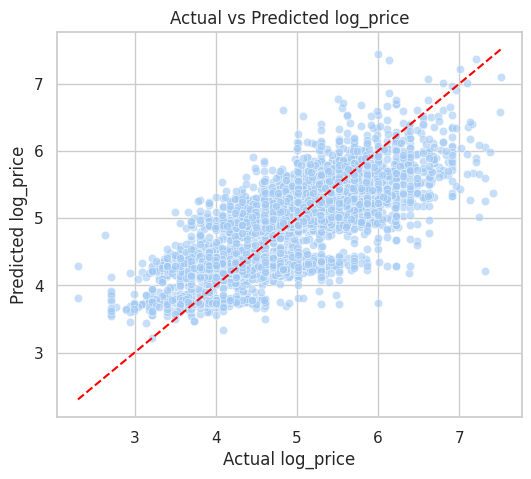

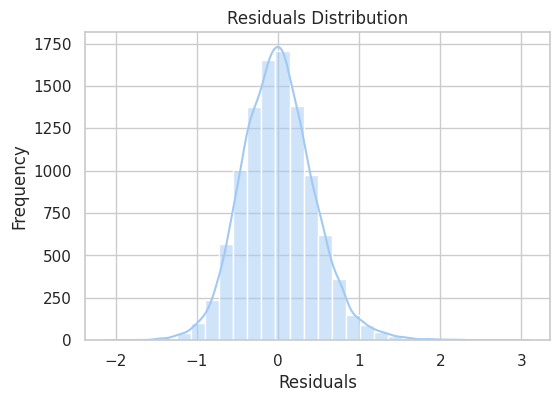

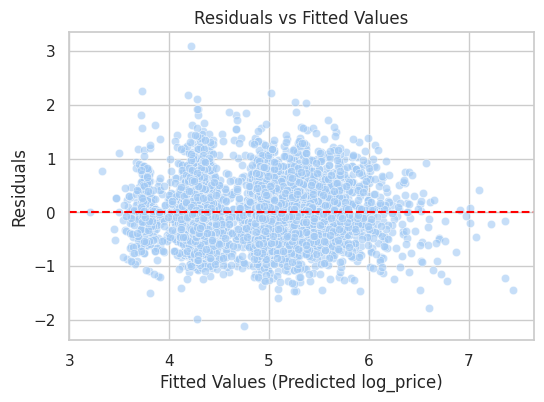

In [13]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Select features and target
X = df.drop(columns=['id', 'log_price'])
y = df['log_price']

# 2. One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 5. Predict on test set
y_pred = lr_model.predict(X_test)

# 6. Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("Model Performance:")
print(f"R-squared: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# 7. Visual Checks

# a. Actual vs Predicted
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual log_price")
plt.ylabel("Predicted log_price")
plt.title("Actual vs Predicted log_price")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# b. Residuals distribution
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# c. Residuals vs Fitted Values
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values (Predicted log_price)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()


 **Observations – Linear Regression Model**




	•	Model training and evaluation:
A Linear Regression model was trained using the cleaned and encoded dataset. The data was split into training and test sets (80/20 split), and categorical variables were one-hot encoded to make them suitable for modeling.
	•	Performance metrics:
The model was evaluated using R-squared, RMSE, and MAE.
	•	R-squared shows how well the model explains the variance in log_price.
	•	RMSE and MAE indicate the average prediction error in log terms. These metrics help compare this baseline model with future iterations.
	•	Actual vs. Predicted plot:
The scatter plot of predicted vs. actual log_price values shows a general alignment, but there is noticeable spread — suggesting the model captures trends but not all details.
	•	Residuals distribution:
The residuals are approximately normally distributed, which supports the assumption that errors are random. However, some spread indicates potential room for improvement.
	•	Residuals vs. Fitted plot:
Residuals appear fairly centered around zero but show some uneven variance, indicating possible heteroscedasticity — this may be improved with feature transformation or regularization.

## Model Performance Check

---



## Actionable Insights and Recommendations

-


___